In [27]:
import altair as alt
import numpy as np
from vega_datasets import data
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import time
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from ipywidgets import interact, fixed
plt.rcParams['figure.figsize'] = [10, 5]
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)


def workshop_theme(*args, **kwargs):
    return {
            "width": 500,
            "height": 300,

            "config": {
               "title": {
                  'fontSize': 20
              },
              "style": {
                "bar": {
                  "size": 20
                },
                "guide-title": {
                  "fontSize": 25
                },
                "guide-label": {
                  "fontSize": 20
                },
              },
              "scale": {
                "bandPaddingInner": 0.5,
                "bandPaddingOuter": 0.5
              },
              "legend": {
                "symbolSize": 100,
                "titleFontSize": 20,
                "labelFontSize": 18
              },
              "axis": {
                "titleFontSize": 20,
                "labelFontSize": 18
              }
            }
          }
          

alt.themes.register('workshop_theme', workshop_theme)
alt.themes.enable('workshop_theme');

# Robust Statistics

<center>
    
<img src="https://i.pinimg.com/originals/8b/df/a1/8bdfa164b2571afc5b90cd74627efa73.jpg" width="250px" align="center">


<img src="http://images1.fanpop.com/images/photos/2000000/Cute-Nessie-loch-ness-monster-2030920-482-261.gif" width="300px" align="center">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png" width="400px" align="center">

</center>


# Outline

<h3><font color="red">Section 1:</font><h3>

- introduction
- review (ish)
- the meaning and study of robustness
- comparing robustness of various estimators



<h3><font color="red">Section 2:</font><h3>
    
- robustness of the t-test when population is skewed
- robustness of the t-test when population is contaminated
- the percentile bootstrap test


# Why learn about statistics?

- evidence-based decisions are only as accurate as the methods on which they are based
- we want to evaluate our quantitative methods to make sure we are using recommended approaches 
- more effective decision makers
- to help us interpret others' results

# Replicability problem

>  Significant results from cognitive psychology could be
replicated successfully 50% of the time and significant
results from social psychology could be replicated 25% of the
time (Open Science
Reproducibility project, 2015).

- many classic studies have not been replicated
- many areas of psychology have poor replication rates
- while there are many reasons for this, one reason is that psychology is not routinely using robust methods



# Review (ish)
- distributions (bulk, tails, types)
- central tendency and scale
- null, alternative (coin flips)
 - pval
 - confidence interval
- power
- questions?

# Wilcox reading
- pretty much sums up the main issues here

<img src="https://images-na.ssl-images-amazon.com/images/I/41ui64iGoQL._SX258_BO1,204,203,200_.jpg" width="450px" align="center">



# The meaning of robustness
 - Measures that characterize a distribution are robust if small changes to the distribution have relatively little effect on their value
 
- μ, σ, X̄ , and s are not robust as will become evident


# Measuring robustness
- Finite sample breakdown point
 - small finite-sample breakdown is bad
- Variance (AKA the sqared Standard error [SE])
 - small standard error is good

# Finite-sample breakdown point

- The smallest proportion of observations that, when altered sufficiently, can render a statistic meaningless



- a measure of resistance to contamination





- e.g., if the ith value among the observations X<sub>1</sub> ,...X<sub>n</sub> goes to infinity, X̄ goes to infinity too



 - therefore the finite-sample breakdown point of the sample mean is 1/n
 - by contrast, the median is .5
 



- small finite-sample breakdown is bad

# Examples with the mean and median

In [2]:
data=[44, 45, 50, 87, 88, 114, 151, 210, 219, 246, 253, 262, 296, 299, 306, 376, 428, 515, 666, 1310, 2611]

np.mean(data)

408.3809523809524

In [3]:
data=[40, 45, 50, 87, 88, 114, 151, 210, 219, 246, 253, 262, 296, 299, 306, 376, 428, 515, 666, 1310, 2611]

np.median(data)

253.0

# The Trimmed mean

- simply sort your values and trim of some proportion of values from each end
- then calculate the regular mean for the remaining values



For example, suppose our original data are:

1,2,3,4,5,6,7,8,9,10




After trimming 20% off each end we get:

3,4,5,6,7,8




Finnaly, we take the mean of what is left over, that is:

X̄<sub>t</sub> = (3+4+5+6+7+8) / 6

X̄<sub>t</sub> = 5.5



Formally the trimmed mean is calculated as follows:: 
- let X<sub>1</sub> ,...X<sub>n</sub> be a random sample and X<sub>(1)</sub> ≤ X<sub>(2)</sub> ≤ X<sub>(n)</sub> be the observations in ascending order



- the proportion to trim is γ, 0 ≤ γ ≤ .5

- Let g = [γn] rounded down to the nearest integer

In symbols the trimmed mean is:

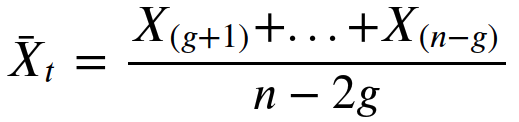

In [26]:
data=[40, 45, 50, 87, 88, 114, 151, 210, 219, 246, 253, 262, 296, 299, 306, 376, 428, 515, 666, 1310, 2611]

stats.trim_mean(data, .2)

249.84615384615384

The finite-sample break down of  X̄<sub>t</sub> is γ

# Review
- we have seen one way to assess robustness of an estimator
 - i.e., the finite-sample break down
- the trimmed mean and median have a higher finite-sample break down than the mean
- the trimmed mean is the average of the values left over after trimming some proportion from the tails

# Quiz 
- What is the purpose of using a measure of central tendancy?
- How are the median and the trimmed mean related?

Calculate the 20% trimmed mean for the following values:

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 1000

# Visual comparison of the mean to other estimators
- the trimmed mean is just one robust estimator that has been shown to have practical value
- there are many others which we don't have time to discuss
- let's look at how a few of them do based on some real data

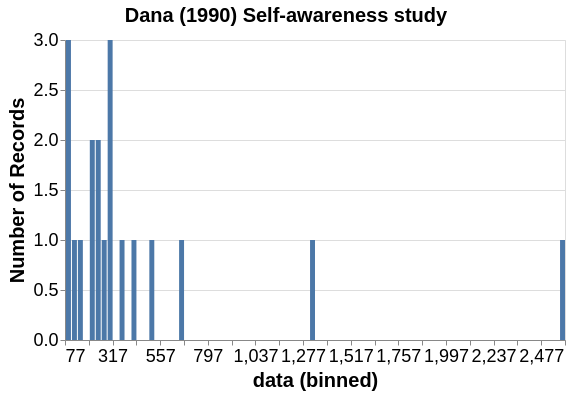

In [5]:
df=pd.DataFrame({'data': [77, 87, 88, 114, 151, 210, 219, 246, 253, 262, 296, 299, 306,
376, 428, 515, 666, 1310, 2611]})

alt.Chart(df).mark_bar().encode(
    y='count()',
    x=alt.X('data', bin=alt.Bin(maxbins=13, step=30, nice=False)),
    tooltip='data'
).properties(title='Dana (1990) Self-awareness study') 

- X̄ = 448.1

- M = 262

- X̄<sub>t.2</sub> = 276.9

- X̄<sub>w.2</sub> = 282.2

- M-estimator (with ψ using 1.28) = 285.1

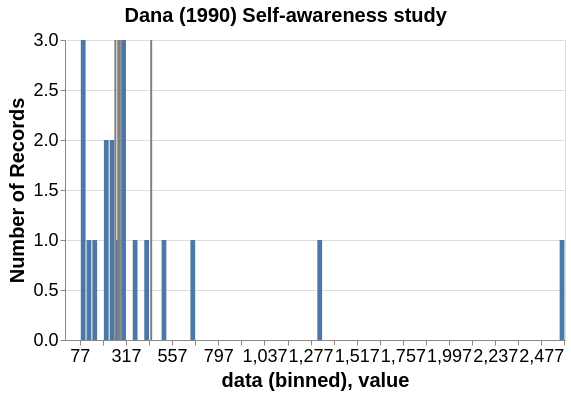

In [6]:
est=pd.DataFrame({'estimator': ['mean', 'median', 'trim_mean', 'win_mean', 'M_est'], 
                  'value': [448.1, 262, 276.9, 282.2, 285.1]})

x=alt.Chart(df).mark_bar().encode(
    y='count()',
    x=alt.X('data', bin=alt.Bin(maxbins=13, step=30, nice=False)),
    tooltip='data'
).properties(title='Dana (1990) Self-awareness study') 

y=alt.Chart(est).mark_rule(size=2, color='gray').encode(
    x='value',
    #color='estimator',
    tooltip=['estimator', 'value']
).interactive()

x+y

# The point is here is that the mean is not resistant to outliers compared to other estimators

- In other words, the mean has the lowest finite-sample break down point of all estimators that we've considered here
- The mean does not do well in terms of being "close" to all other values

- There are other ways of measuring robustness that are more complex and the mean performs poorly in all cases

# Estimating variance of any estimator
- another way of assessing robustness
- with repeated sampling, how variable is our estimator?
 - if it is highly variable, this is bad (reduces power and precision)

# Example using a computer
- estimating the variablility of the mean

In [23]:
newmean=pd.DataFrame([], columns=['newmean'])
newvar=pd.DataFrame([0], columns=['newvar'])
np.random.seed(42)
popsize=1000

source = pd.DataFrame({'males': np.random.normal(0, 1, popsize)})
source = pd.melt(source, id_vars=source.index.name, value_vars=source.columns, 
                 var_name='Experiment', value_name='Measurement')

p=alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step',
    color='#0000ff',
).encode(
    alt.X('Measurement', title='x', bin=alt.Bin(maxbins=50)),
    alt.Y('count()', stack=None),
).properties(title='population (normal)')


def ani(source, newmean, newvar, popsize):
    
    newsamp=source.sample(frac=10/popsize, replace=True)

    s=alt.Chart(newsamp).mark_bar(
        opacity=0.3,
        color='#008000',
    ).encode(
        alt.X('Measurement', title='x*', bin=alt.Bin(maxbins=10)),
        alt.Y('count()'),
    ).properties(title='random sample')

    newmean=newmean.append({'newmean': newsamp.mean()[0]}, ignore_index=True)

    m=alt.Chart(newmean).mark_bar(
        opacity=0.3,
        color='#ff0000',
    ).encode(
        alt.X('newmean', title='X̄', bin=alt.Bin(maxbins=50)),
        alt.Y('count()'),
    ).properties(title='sampling distribution')

    v=alt.Chart(pd.DataFrame([newmean.var()[0]], columns=['newvar'])).mark_text(
        color='black',
        size=20
    ).encode(
        text=alt.Text('newvar', format='.4')
    ).properties(title='variance of X̄s')

    r1=alt.hconcat(p,s,m)
    r2=alt.vconcat(r1,v)
    res=r2.configure_view(strokeOpacity=0).configure_axis(grid=False)
    
    return res,newmean,newvar

In [25]:
# res, newmean, newvar=ani(source, newmean, newvar, popsize)
# res

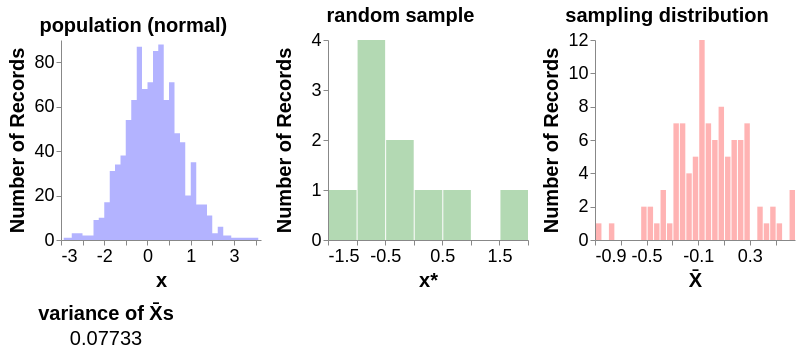

In [24]:
for i in range(100):
    res, newmean, newvar=ani(source, newmean, newvar, popsize)
    display(res)
    clear_output(wait=True)
    #time.sleep(.1)

In [10]:
se=pd.DataFrame({'estimator': ['mean', 'mean', 'mean', 'mean',
                                'median', 'median', 'median', 'median',
                                'trim_mean', 'trim_mean', 'trim_mean', 'trim_mean'], 
                  'distribution': ['normal', 'lognormal', 'one-wild', 'slash',
                                  'normal', 'lognormal', 'one-wild', 'slash',
                                  'normal', 'lognormal', 'one-wild', 'slash'],
                  'var': [.1, .47, 1.9, np.nan,
                        .14, .17, .17, .70,
                        .11, .18, .14, .96],
                'se_str': ['.1', '.47', '1.9','∞',
                        '.14', '.17', '.17', '.70',
                        '.11', '.18', '.14', '.96']})


c=alt.Chart().encode(
    y=alt.Y('estimator'),
    tooltip=['estimator', 'distribution', 'var']
)

a=c.mark_rect().encode(
    x=alt.X('distribution', sort=['normal', 'lognormal', 'one-wild', 'slash'], axis=alt.Axis(labelAngle=0)),
    color=alt.Color('var', scale=alt.Scale(domain=[0,.5]))
)

b=c.mark_text(baseline='middle', align='center', size=20, color='indianred', fontWeight='bold').encode(
    x=alt.X('distribution', sort=['normal', 'lognormal', 'one-wild', 'slash'], 
            axis=alt.Axis()),
    text='se_str',
)

res=alt.layer(a,b,data=se).properties(width=500, height=500, title='variances for various estimators (Wilcox, 2015)')

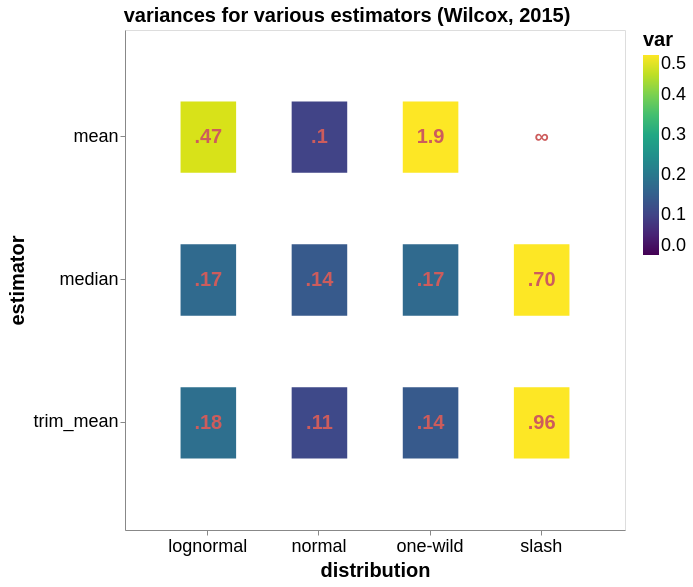

In [11]:
res

Formally the variance of any estimator is derived as follows: 


- Let θ be any estimator based on a random sample X<sub>1</sub> ,...,X<sub>n</sub>

- For a given sample size n, randomly sample with replacement from a known distribution, computing θ


- Repeat this B times, yielding θ<sub>1</sub> ,..., θ<sub>B</sub>


The estimate of the squared SE of θ is:

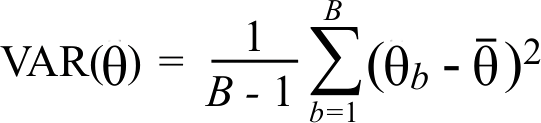


# Review

- the mean has large standard error when sampling is from distributions other than normal
 - this contributes somwhat to lower power and larger confidence intervals



- the median performs well, but perhaps not as well as we would like under normality




- one goal is to find an estimator that performs well under normality and continues to perform well across a wide range of distributions

 - the trimmed mean seems to satisfies this goal
 




 
- remember that generally we never know the shape of the population
 - but we can use a computer to generate various distributions and this allows us to compare estimators in terms of variability 



- before computers were used routinely, we were just assuming normality or hoping that departures from normaility would not lead to practical concerns

# Quiz

- do we want to choose an estimator with a large or small variance?
 - why?
 
- how do heavy tails in the population affect the variance of the mean?
 - why?
 
- It is recommended that trimming not exceed 20%. What do you think happens to the variance of the trimmed mean as trimming is increased (25%, 30%, etc...)?

# Testing hypotheses

- how do the above issues with the mean and SD affect hypotheses testing (comparing groups and measuring associations)?

 1. examine the t-test when population distribution is skewed
 2. examine the t-test when population distribution is heavy tailed
 3. examine correlations when heteroscedasticity is present
 


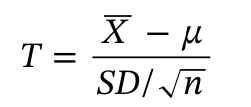

- this is a one-sample t-test



- you would use it to test if your sample mean is reliably different from some theoretical constant
 - e.g., you think that the average height in your city is larger than the provincial average height reported by Stats Canada



- This formula is assumed to follow a T distribution, but does it?

- Let's test this assumption by resampling from a population with a lognormal distribution

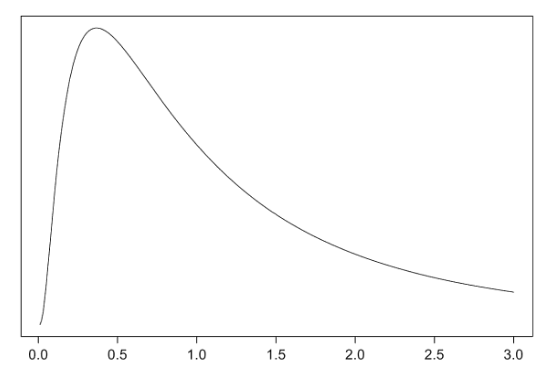



 1. get a computer to generate the lognormal distribution
 2. resample values with replacement thousands of times, each time computing T
 3. plot the resulting empirically derived T distribution against the assumed T distribution

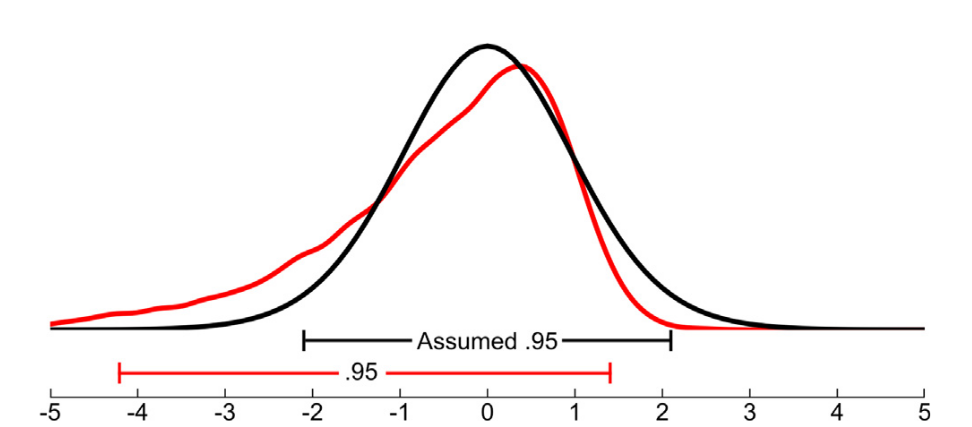

- As you can see the assumed T distribution is very different from the actual T distribution


# The true is the same if we estimate the sampling distribution with real data

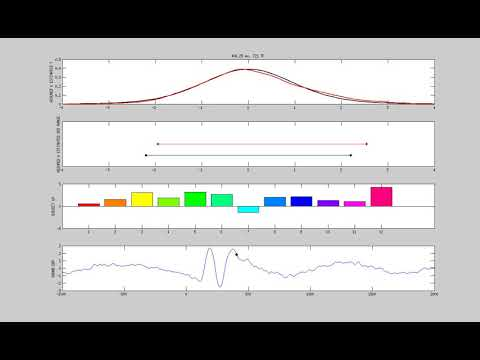

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('IkO4lRPui3U', height=400, width=800)

# The point here is that...

- if the population distribution is skewed, the t-test produces
 - increased type I error (in one tail)
 - increased type II error (in the other tail)
 - i.e., poor probability coverage
 
- let's now assume that the population is heavy-tailed

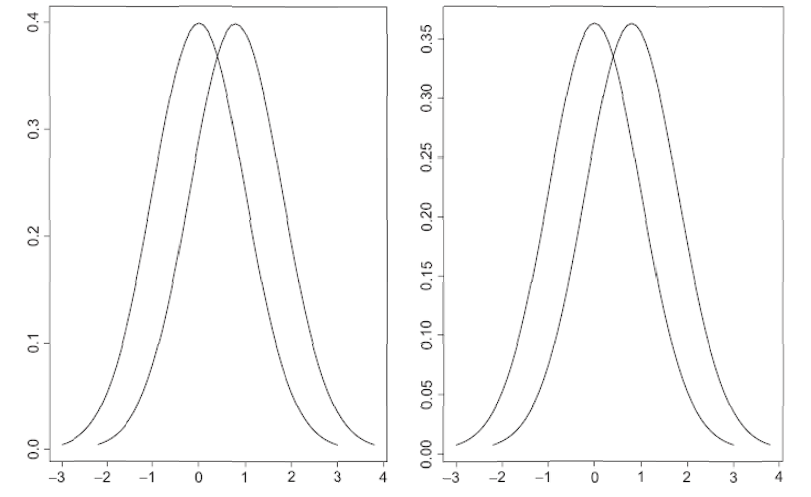


- use a t-test to compare these two sets of data


- the curves look the same, but the curves on the right are called 'contaminated' normal distributions



- they represent what appears to be a small departure from normality


- what do you think power will be in both scenarios?
 - power is the probability of finding an statistical effect (if one exists)
 - there is clearly an effect in this example (average difference = .8)

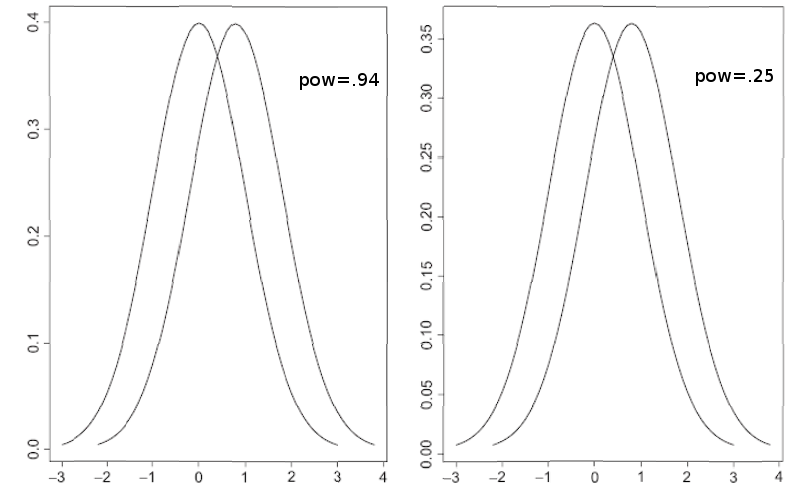


# Review

- if the population distribution is heavy tailed...
 - the t-test leads to a substantial decrease in power
- small departures from normality lead to big changes in power

# Quiz

- if your population distributions don't overlap, will power be high?
- why do contaminiated normal distributions lead to low power?

# The percentile bootstrap test


- no assumption of normality



- works well even when samples are small



- can be used in conjunction with the trimmed mean



- performs well under normality and continues to perform well when distributions are non-normal



- no weird formula!!



- note that there are many kinds of bootstrap tests but we only have time to discuss one method


- can be extended to compare multiple groups (F-test)



- can be used to make correlations (or regressions) robust

# Instructions for the percentile bootstrap test
- let's look at the two-sample case




- suppose we want to compare the height of males to females



- we want to see if there is a statistical difference between males and females in terms of height



 1. Randomly resample with replacement n values from the male sample
 



 2. Randomly resample with replacement n values from the female sample



 3. Compute X̄<sub>males</sub> - X̄<sub>females</sub> based on you new samples (the mean difference in height)



 4. Store the difference & repeat steps 1-3 many times



 5. chart the distribution of differences and look at the middle 95% (the confidence interval)
 
 


- If the confidence interval contains 0, there is no reliable difference in height between males and females
 - otherwise, you have found a statistical difference


# Example using a computer

In [13]:
diffs=pd.DataFrame([0], columns=['newdiff'])
np.random.seed(42)
popsize=1000

source = pd.DataFrame({'males': np.random.normal(0, 1, popsize), 'females': np.random.normal(.01, 1, popsize)})
source = pd.melt(source, id_vars=source.index.name, value_vars=source.columns, 
                 var_name='Experiment', value_name='Measurement')

o=alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement', title='height', bin=alt.Bin(maxbins=50)),
    alt.Y('count()', stack=None),
    color=alt.Color('Experiment',scale=alt.Scale(range=['#0000ff', '#008000']))
).properties(title='original samples')


def ani(source, diffs, popsize):
    
    newsamp=source.sample(popsize, replace=True)
    diff=newsamp.groupby('Experiment').mean().diff().iloc[1][0]
    diffs=diffs.append({'newdiff': diff}, ignore_index=True)
    
    s=alt.Chart(newsamp).mark_area(
        opacity=0.3,
        interpolate='step'
    ).encode(
        alt.X('Measurement', title='height', bin=alt.Bin(maxbins=50)),
        alt.Y('count()', stack=None),
        color=alt.Color('Experiment',scale=alt.Scale(range=['#0000ff', '#008000']))
    ).properties(title='two new samples')
    
    
    d=alt.Chart(diffs).mark_area(
        opacity=0.3,
        color='indianred',
        interpolate='step'
    ).encode(
        alt.X('newdiff', title='male - female', bin=alt.Bin(maxbins=100)),
        alt.Y('count()'),
    ).properties(title='mean differences').interactive()
    
    z=alt.Chart(pd.DataFrame([0], columns=['zero'])).mark_rule(
        color='black',
    ).encode(
        alt.X('zero'),
    )

    res=alt.hconcat(o,s,d+z)
    
    return res,diffs,d

In [19]:
# res, diffs, d=ani(source, diffs, popsize)
# res

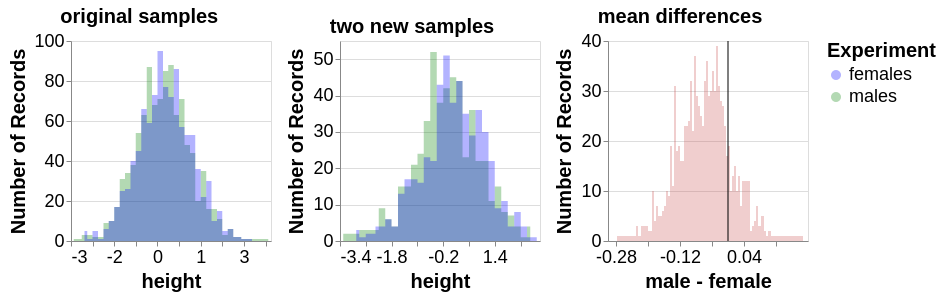

In [18]:
for i in range(1000):
    res, diffs, d=ani(source, diffs, popsize)
res

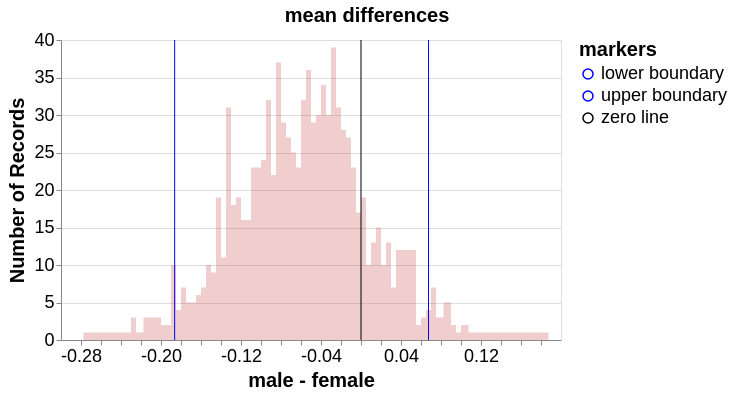

In [21]:
vals=diffs['newdiff'].sort_values()
l=round(.05 * 1000/2)
u=1000-l
ci_low=vals.iloc[l+1]
ci_up=vals.iloc[u]
ci=pd.DataFrame({'ci': [ci_low, ci_up, 0], 'markers': ['lower boundary', 'upper boundary', 'zero line']})

c=alt.Chart(ci).mark_rule(point=True, color='black').encode(
    alt.X('ci'),
    color=alt.Color('markers', scale=alt.Scale(range=['blue', 'blue', 'black']))
).properties(title='95% confidence interval')

d + c

# Review

- the percentile bootstrap is a robust alternative to traditional tests





- should be used with trimmed means (
 - i.e., take the difference of the trimmed means rather than the regular means




- this test can be extended to multiple groups (F-test) and correlations




- the issues with traditional tests become worse when dealing with correlations
 - therefore, correlations and regressions improve substantially when switching to robust alternatives


# Quiz

- if someone asks you,

> Do traditional tests lead to more false positives or more false negatives?

- how would you respond?


# Thank you

- I'll leave you with an animation of the percentile bootstrap the sample size is 1!!

- yes that can also be done...

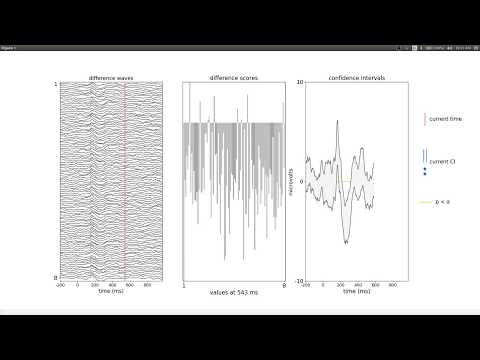

In [17]:
from IPython.display import YouTubeVideo
YouTubeVideo('CzwSxIo711I', height=500, width=800, start=22)